In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import math as m
import statistics as stat
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

******************************************************************************************************************
# Diagonistics of Data
******************************************************************************************************************

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [5]:
#Check for nan values in Train DF
True in pd.isnull(train)

False

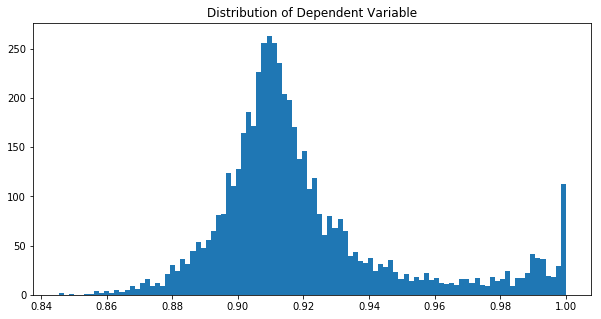

In [6]:
# Explore distribution of target
plt.figure(figsize=(10,5))
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [7]:
train.columns = train.columns.str.replace(' ', '')

# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

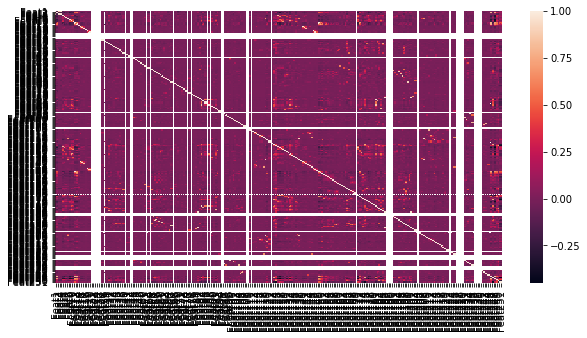

In [8]:
#correlation matrix heatmap
corr = X_train.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [9]:
#columns with a standard deviation of 0 should be removed
X_train.describe()

,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,...,Feat242,Feat243,Feat244,Feat245,Feat246,Feat247,Feat248,Feat249,Feat250,Feat251
count,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,...,5331.000000,5331.000000,5331.000000,5331.0,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000
mean,0.998506,0.142550,0.998887,0.996074,0.099018,0.040598,0.028137,0.013060,0.050136,0.027348,...,0.001657,0.005346,0.000563,0.0,0.522928,0.078381,0.434711,0.222165,0.154182,0.521247
std,0.012047,0.064343,0.010696,0.015199,0.106834,0.077767,0.074117,0.053347,0.100559,0.067602,...,0.021473,0.054956,0.018747,0.0,0.176868,0.087822,0.258655,0.102157,0.107699,0.095065
min,0.281689,0.000000,0.278493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000110,0.000000,0.000000,0.000000,0.159137
25%,0.998859,0.164706,0.998435,0.996382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.470588,0.026702,0.267000,0.150607,0.082090,0.461988
50%,0.999577,0.167059,0.999583,0.996741,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.562353,0.042039,0.474000,0.205960,0.135370,0.523780
75%,0.999956,0.174118,0.999863,0.997143,0.133333,0.057143,0.000000,0.000000,0.045455,0.000000,...,0.000000,0.000000,0.000000,0.0,0.641098,0.091802,0.632000,0.271628,0.209626,0.579569
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.995914,1.000000,1.000000


In [10]:
#All standard deviations
X_train_std_dev = X_train.describe().iloc[2:3,:].values

#All columns without a standard deviation of 0
X_train_std_0 = (X_train_std_dev!=0.0)[0].tolist()

#Cleaned Data without zero variance columns
X_train_reduc = X_train.iloc[:,X_train_std_0]

In [11]:
X_train_reduc.describe()

,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,...,Feat241,Feat242,Feat243,Feat244,Feat246,Feat247,Feat248,Feat249,Feat250,Feat251
count,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,...,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000
mean,0.998506,0.142550,0.998887,0.996074,0.099018,0.040598,0.028137,0.013060,0.050136,0.027348,...,0.001032,0.001657,0.005346,0.000563,0.522928,0.078381,0.434711,0.222165,0.154182,0.521247
std,0.012047,0.064343,0.010696,0.015199,0.106834,0.077767,0.074117,0.053347,0.100559,0.067602,...,0.024672,0.021473,0.054956,0.018747,0.176868,0.087822,0.258655,0.102157,0.107699,0.095065
min,0.281689,0.000000,0.278493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000110,0.000000,0.000000,0.000000,0.159137
25%,0.998859,0.164706,0.998435,0.996382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.470588,0.026702,0.267000,0.150607,0.082090,0.461988
50%,0.999577,0.167059,0.999583,0.996741,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.562353,0.042039,0.474000,0.205960,0.135370,0.523780
75%,0.999956,0.174118,0.999863,0.997143,0.133333,0.057143,0.000000,0.000000,0.045455,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.641098,0.091802,0.632000,0.271628,0.209626,0.579569
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.995914,1.000000,1.000000


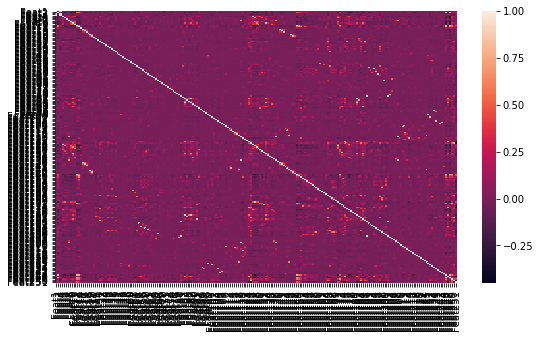

In [12]:
#correlation matrix heatmap
corr = X_train_reduc.corr()

plt.figure(figsize=(9,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

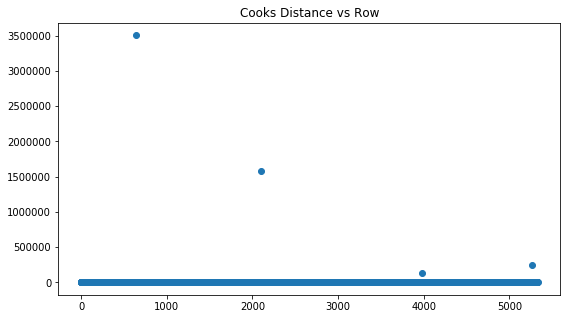

In [13]:
#cooks_data.sort_values(by="cooks_d", ascending=False).cooks_d
cooks_data = pd.read_csv("cooks_data.csv")
c_data = cooks_data.sort_values(by="cooks_d", ascending=False).copy()
fig, ax = plt.subplots(1,1, figsize=(9,5))
ax.set_title("Cooks Distance vs Row")
ax.scatter(cooks_data.index.values, cooks_data.cooks_d.values);

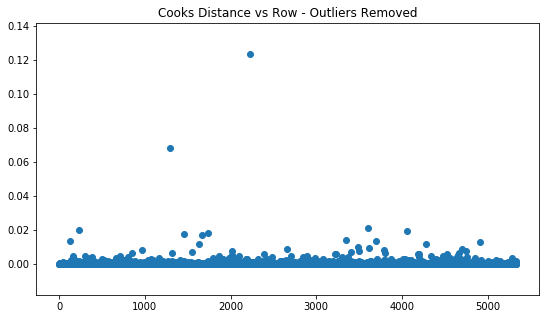

In [14]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
  
non_outliers = c_data.iloc[5:,:]

ax.set_title("Cooks Distance vs Row - Outliers Removed")
ax.scatter(non_outliers.index.values, non_outliers.cooks_d.values);
fig.savefig("cooks_distance_post.png")

In [15]:
#REMOVING OUTLIERS

X_train_reduc_no_outliers = X_train_reduc.drop(X_train_reduc.index[[3046,  639, 2101, 5260, 3983]])
y_train_no_outliers = y_train.drop(y_train.index[[3046, 639, 2101, 5260, 3983]])

******************************************************************************************************************
# Testing Assumptions of Linear Regression
******************************************************************************************************************

In [16]:
#split training set into training and validation set
X_tr, X_test, y_tr, y_test = train_test_split(X_train_reduc_no_outliers, y_train_no_outliers, test_size=0.20, random_state=181)

In [17]:
#Calculating VIF to assess multicolinearity. Generally, higher than 5 implies multicollinearity
features = "+".join(X_train_reduc.columns).replace(" ", "")

#Compute OLS and determine VIF of coefficients
y, X = dmatrices('Target~'+features, train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [18]:
vif.head()

,VIF Factor,features
0,7.059811e+08,Intercept
1,1.980391e+01,Feat1
2,5.675979e+00,Feat2
3,1.417245e+01,Feat3
4,4.108802e+01,Feat4


In [19]:
#There are 209 coefficients of OLS in total. Out of them, 163 have a VIF of greater than 5
np.sum(vif["VIF Factor"]>5)

163

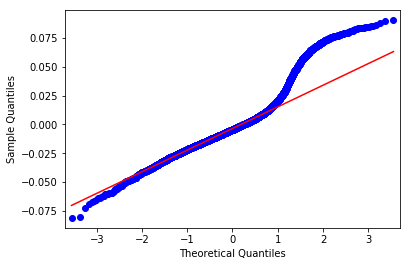

<Figure size 720x360 with 0 Axes>

In [20]:
X_train.exog = sm.add_constant(X_train_reduc)
mod_fit = sm.OLS(y_train, X_train_reduc).fit()
res = mod_fit.resid
fig = sm.qqplot(res, line='q')
plt.figure(figsize=(10,5))
plt.show()

******************************************************************************************************************
# Model 1: Ordinary Least Squares Prediction
******************************************************************************************************************

In [24]:
#PREDICTION

# Cross Validation of OLS
myscores = np.array([])

reg = Lin_Reg()
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, scores)

np.mean(np.sqrt(-1*myscores))

0.059393638509512126

******************************************************************************************************************
# Models 2, 3, and 4: Regularized Linear Regression
******************************************************************************************************************

In [33]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [34]:
# Set of shrinkage parameters
lambdas = [.001, .003,.004, .005,.01, .04, .1,.2,.5,.75, 1, 5, 10, 20, 30, 40, 50, 100, 500, 1000]

# Set of alphas for elastic net
alphs = [0.000001, 0.00001, 0.00003, .000033, 0.00004, 0.0001, 0.001,0.002,0.0023, 0.0025, 0.0027, 0.003, 0.005, 0.007, 0.01,0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9]  
# note: had warnings for convergence for 0 and 1, look into eps


# Initialize a 5-fold KFOLD object 
kfold5 = KFold(5, shuffle=True)

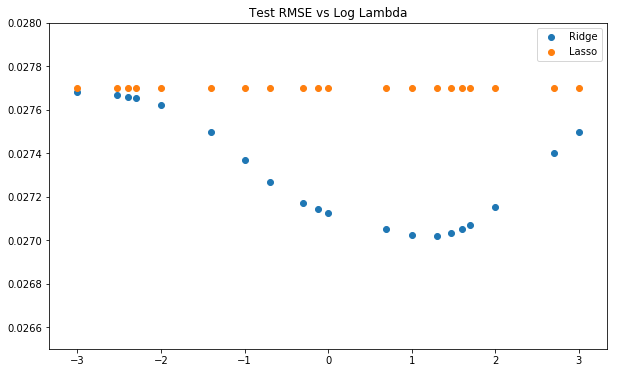

In [42]:
# NOTE: NEED TO CROSS VALIDATE

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ridge_rmses = [] 
log_lambdas = []

for ele in lambdas:
    ridge_object = Ridge(alpha=ele)
    ridge = ridge_object.fit(X_tr, y_tr)
    ridge_rmses.append(scoreRMSE(ridge, X_test, y_test))
    log_lambdas.append(m.log10(ele))

ax.scatter(log_lambdas, ridge_rmses, label="Ridge")

ax.set_title("Ridge: RMSE vs Log Lambda");
#l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
#l1_r
#ax.set_ylim((0.2,0.3))

lasso_rmses = [] 

for ele in lambdas:
    lasso_object = Lasso(alpha=ele)
    lasso = lasso_object.fit(X_tr, y_tr)
    lasso_rmses.append(scoreRMSE(lasso, X_test, y_test))
    
#ax.set_ylim([0.0279,0.0280])
ax.scatter(log_lambdas, lasso_rmses, label="Lasso")
ax.set_title("Lasso: RMSE vs Log Lambda"); 

ax.set_ylim([0.0265,0.028]);
ax.legend();
# NOTE: L2 ERROR IS SQUARED, Should presence of outlier affect it?


ax.set_title("Test RMSE vs Log Lambda"); 


#ax.set_ylim([0.0250,0.0280]);

fig.savefig("testrmse_vs_log_lambda.png")

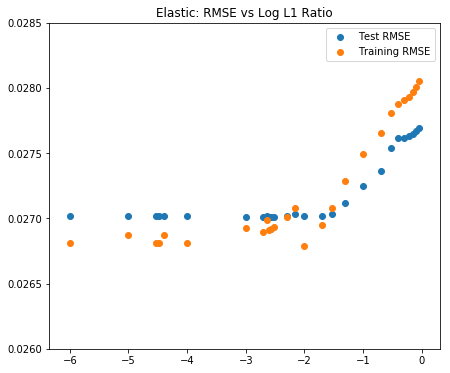

In [83]:
# params
lambda_2 = lambdas[ridge_rmses.index(min(ridge_rmses))]
lambda_1 = lambdas[lasso_rmses.index(min(lasso_rmses))]

fig, ax = plt.subplots(1, 1, figsize=(7,6))

elastic_rmses_train = []
elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = lambdas, cv=kfold5)
    elastic = elastic_object.fit(X_tr, y_tr)
    elastic_rmses.append(scoreRMSE(elastic, X_test, y_test))
    elastic_rmses_train.append(scoreRMSE(elastic, X_tr, y_tr))
    log_ratios.append(m.log10(ele))
    
ax.set_ylim([0.026,0.0285])
ax.scatter(log_ratios, elastic_rmses, label="Test RMSE")
ax.scatter(log_ratios, elastic_rmses_train, label="Training RMSE")
ax.set_title("Elastic: RMSE vs Log L1 Ratio");
l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
l1_r
ax.legend();

fig.savefig("elbow_rmse_vs_log_l1.png")

In [84]:
#for i in range(len(elastic_rmses) -1):
#    a = elastic_rmses[i]
#    b = elastic_rmses[i+1]
#    print((b - a)/b)
#    print(i+1)

# Look at graph, find that 0.003 is the elbow point
print("\033[1mOptimal L1-Ratio\033[0m: {0}".format(alphs[11]))


Optimal L1-Ratio: 0.003


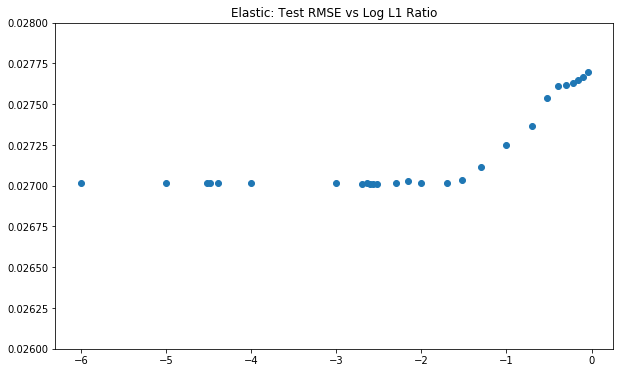

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = lambdas, cv=kfold5)
    elastic = elastic_object.fit(X_tr, y_tr)
    elastic_rmses.append(scoreRMSE(elastic, X_test, y_test))
    log_ratios.append(m.log10(ele))
    
ax.set_ylim([0.026,0.028])
ax.scatter(log_ratios, elastic_rmses)
ax.set_title("Elastic: Test RMSE vs Log L1 Ratio");

l1 = alphs[elastic_rmses.index(min(elastic_rmses))]
#ax.set_ylim((0.2,0.3))

fig.savefig("testrmse_vs_log_l1.png")

In [86]:
# Best L1 from graph
l1 = alphs[elastic_rmses.index(min(elastic_rmses))]

elastic_object = ElasticNetCV(l1_ratio = l1, alphas = lambdas, cv=kfold5)
elastic = elastic_object.fit(X_tr, y_tr)
print(scoreRMSE(elastic, X_test, y_test))

elastic_object.alpha_
#ax.set_ylim((0.2,0.3))

0.02700977665315976


0.003

In [88]:
#PREDICTIONS

myscores = np.array([])

# RIDGE
reg = Ridge(alpha= 30)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

#LASSO
reg = Lasso(alpha= 0.001)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

#ELASTIC NET
reg = ElasticNet(random_state=181, l1_ratio = 1/30000, alpha=0.003) 
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

print(np.sqrt(myscores))

[0.02734449 0.02806384 0.02729521]


******************************************************************************************************************
# Model 5, 6, 7, & 8: Tree Models
******************************************************************************************************************

In [93]:
myscores = np.array([])

#Decision Tree
reg = DecisionTreeRegressor()
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))
    
# Random Forest
clf = RandomForestRegressor(n_estimators=100,random_state=181)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))
    
#AdaBoost Decision Tree
reg = AdaBoostRegressor(n_estimators=100)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

#Gradient Boosting Model (Regression Tree)
reg = GradientBoostingRegressor()
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
myscores = np.append(myscores, np.mean(-1*scores))

print(np.sqrt(myscores))

[0.03834357 0.03795464 0.02942723 0.02719666]


In [ ]:
#Tuning Gradient Boosting Model
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate': (0.05, 0.1, 0.2),
    'n_estimators': (50, 100, 150),
    'subsample': (0.5, 0.7, 1),
    'max_depth': (3,6,9)
}

gbr = GradientBoostingRegressor()
reg = GridSearchCV(gbr, parameters, cv=5, scoring='neg_mean_squared_error')
reg.fit(X_tr, y_tr)

In [64]:
reg.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}

In [94]:
reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1)
scores = cross_val_score(reg, X_tr, y_tr, cv=5,scoring='neg_mean_squared_error')
np.sqrt(np.mean(-1*scores))

0.027189577827229434

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

parameters = {
    'learning_rate': (0.01, 0.025, 0.05, 0.1),
    'gamma': (0.3, 0.5, 0.7, 1),
    'max_depth': (3,7,12,16,25),
    'lambda': (0.01, 0.05, 0.1, 0.5,1),
    'subsample': (0.5, 0.7, 1),
    'min_child_weight': (1,3,5),
    'reg_alpha': (0,0.1,0.5),
    'colsample_bytree': (0.5, 0.7, 1)
}

xgb = XGBRegressor()
reg = GridSearchCV(gbr, parameters, cv=5)
reg.fit(X_tr, y_tr)

******************************************************************************************************************
# Train and Predict on 80/20 
******************************************************************************************************************

In [118]:
#Elastic Net vs. Gradient Boosting
myscores = np.array([])

reg = ElasticNet(random_state=181, l1_ratio = 1/30000, alpha=0.003) 
reg.fit(X_tr, y_tr)
y_pred = reg.predict(X_test)
myscores = np.append(myscores, mean_squared_error(y_test, y_pred))

reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1)
reg.fit(X_tr, y_tr)
y_pred = reg.predict(X_test)
myscores = np.append(myscores, mean_squared_error(y_test, y_pred))

print(np.sqrt(myscores))

[0.02701767 0.02694591]


******************************************************************************************************************
# Predict on Full Test Set
******************************************************************************************************************

In [138]:
unlabeled = test.iloc[:,1:]
X_train_no_outliers = X_train.drop(X_train.index[[3046,  639, 2101, 5260, 3983]])

In [139]:
#Final Model: Gradient Boosting on Regression Trees without outliers and zero variance columns
reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1)
reg.fit(X_train_no_outliers, y_train_no_outliers)
y_pred = reg.predict(unlabeled)

In [140]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=y_pred, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + unlabeled.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.931715
1,2,0.912686
2,3,0.917482
3,4,0.923929
4,5,0.919191


In [141]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("tuned_gradient_boost.csv", index=False)